In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('./data/GlobalTemperatures.csv')
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [30]:
df['dt'] = pd.to_datetime(df['dt'], errors='coerce') # transformando a coluna dt em tipo datetime(era tipo dtype 'O')

In [31]:
# Criando colunas de 'ano' e 'mês' a partir da coluna dt
df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month

### Análise temporal (Média anual) - [As medidas desse conjunto de dados terminam em 2015!]

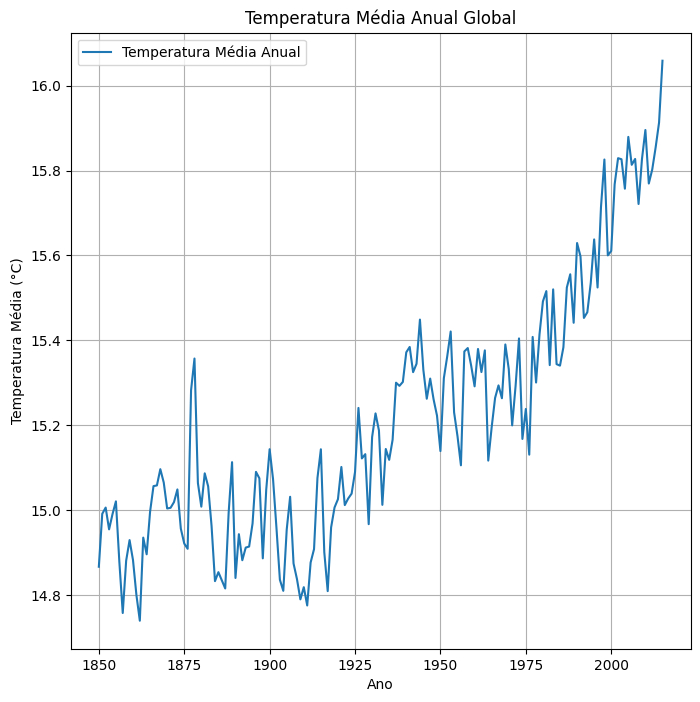

In [41]:
land_ocean_yearly = df.groupby('year')['LandAndOceanAverageTemperature'].mean()

plt.figure(figsize = (8, 8))
plt.plot(land_ocean_yearly.index, land_ocean_yearly.values, label = 'Temperatura Média Anual')
plt.xlabel('Ano')
plt.ylabel('Temperatura Média (°C)')
plt.title('Temperatura Média Anual Global')
plt.grid(True)
plt.legend()
plt.show()

O gráfico demonstra uma clara tendência de alta da temperatura global nos últimos 100 anos(mais ou menos).

### Análise Temporal (Média Mensal)

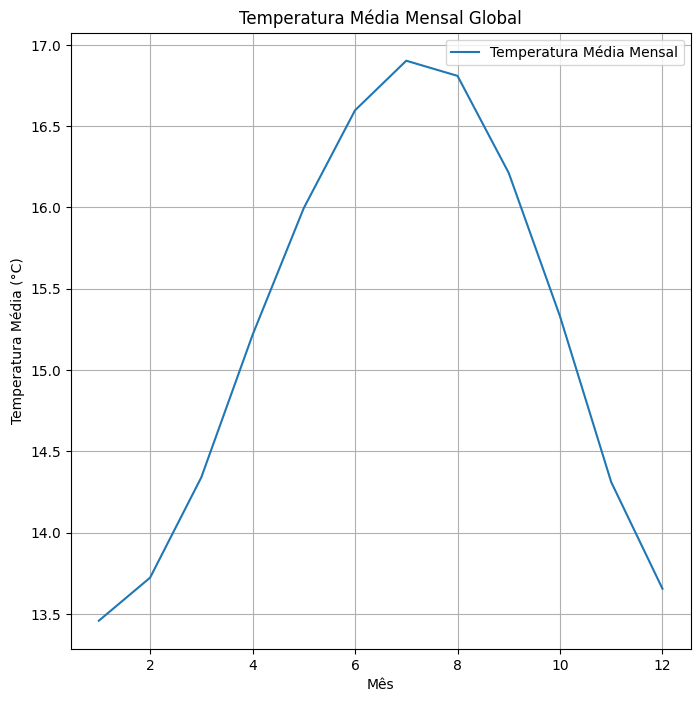

In [42]:
land_ocean_monthly = df.groupby('month')['LandAndOceanAverageTemperature'].mean()

plt.figure(figsize = (8, 8))
plt.plot(land_ocean_monthly.index, land_ocean_monthly.values, label='Temperatura Média Mensal')
plt.xlabel('Mês')
plt.ylabel('Temperatura Média (°C)')
plt.title('Temperatura Média Mensal Global')
plt.grid(True)
plt.legend()
plt.show()

A distribuição normal acima indica que temperatura sobe desce de acordo com os meses do ano. Isso é normal, pois representa as temperaturas em relação às estações do ano.
No gráfico abaixo fica claro que os picos e vales da curva vem subindo, sendo um reflexo da tendência de aumento da temperatura global.

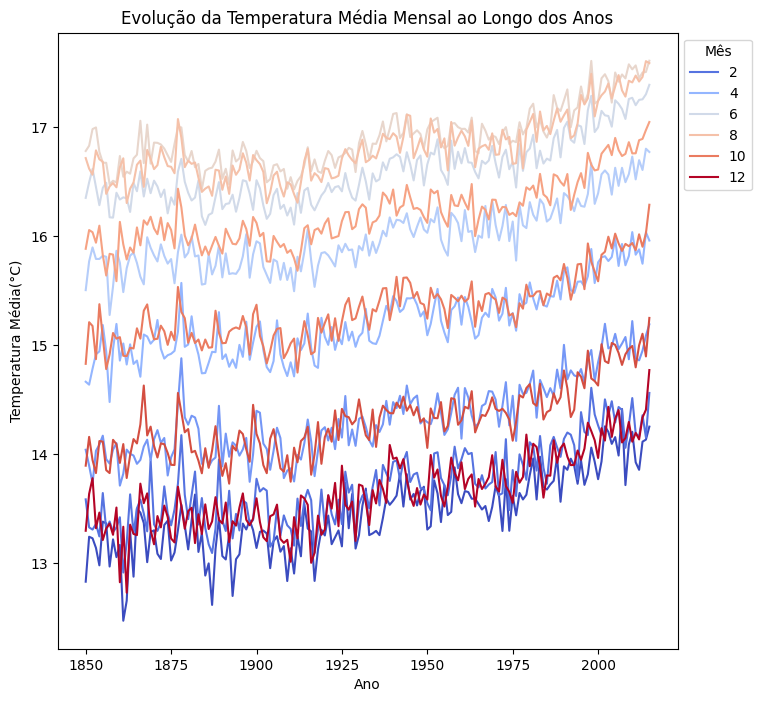

In [47]:
plt.figure(figsize = (8, 8))
sns.lineplot(x=df['year'], y=df['LandAndOceanAverageTemperature'], hue=df['month'], palette='coolwarm')
plt.xlabel('Ano')
plt.ylabel('Temperatura Média(°C)')
plt.title('Evolução da Temperatura Média Mensal ao Longo dos Anos')
plt.legend(title='Mês', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

O gráfico confirma uma situação:
* A temperatura de todos os meses estão subindo(confirmando a tendência de aquecimento global)

### Comparação entre Décadas: Como a Temperatura Evoluiu

In [49]:
df['decades'] = (df['year'] // 10) * 10 # criando a coluna de décadas
decade_avg_temp = df.groupby('decades')['LandAndOceanAverageTemperature'].mean().reset_index()

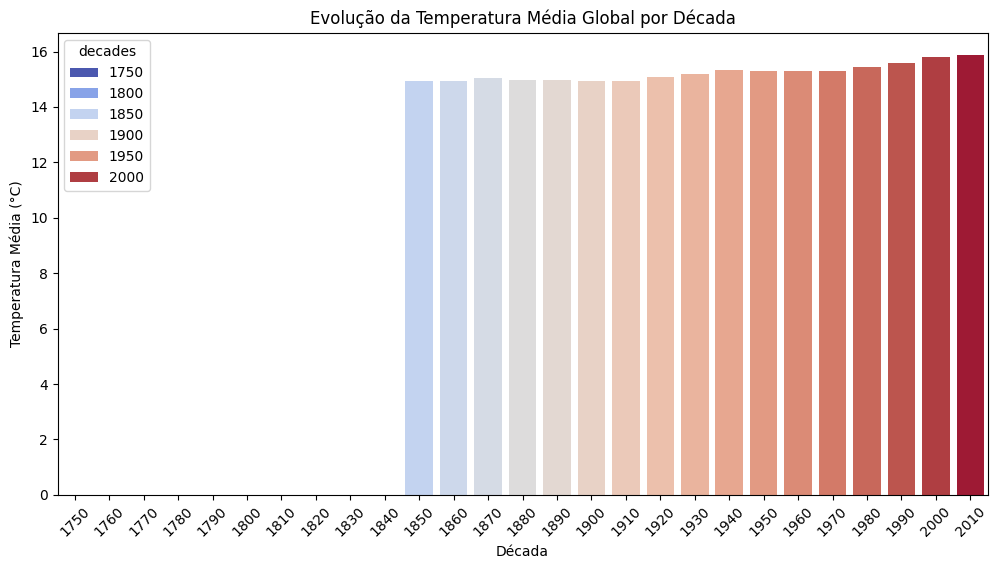

In [57]:
plt.figure(figsize = (12, 6))
sns.barplot(x=decade_avg_temp['decades'], y=decade_avg_temp['LandAndOceanAverageTemperature'], hue=decade_avg_temp['decades'], palette='coolwarm')
plt.xlabel('Década')
plt.ylabel('Temperatura Média (°C)')
plt.title('Evolução da Temperatura Média Global por Década')
plt.xticks(rotation=45)
plt.show()

O gráfico de barras demonstra, também, uma tendência geral de alta em relação as décadas.
Além disso, a mudança significativa de temperatura dos últimos 100 anos(aprox.) bate com o primeiro gráfico.

### Identificação dos anos extremamente quentes ou frios

In [92]:
yearly_avg_temp = df.groupby('year')['LandAndOceanAverageTemperature'].mean().reset_index()
mean_temp = yearly_avg_temp['LandAndOceanAverageTemperature'].mean()
std_temp = yearly_avg_temp['LandAndOceanAverageTemperature'].std()

In [97]:
hot_years = yearly_avg_temp[yearly_avg_temp['LandAndOceanAverageTemperature'] > (mean_temp + 2 * std_temp)]
cold_years = yearly_avg_temp[yearly_avg_temp['LandAndOceanAverageTemperature'] < (mean_temp - 1.5 * std_temp)]

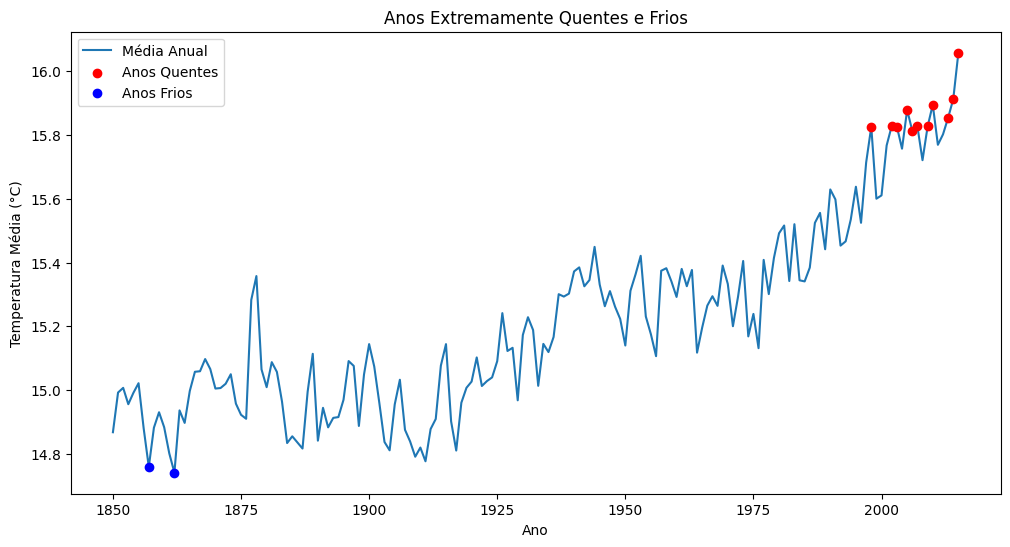

In [98]:
plt.figure(figsize = (12, 6))
plt.plot(yearly_avg_temp['year'], yearly_avg_temp['LandAndOceanAverageTemperature'], label='Média Anual')
plt.scatter(hot_years['year'], hot_years['LandAndOceanAverageTemperature'], color='red', label='Anos Quentes', zorder=3)
plt.scatter(cold_years['year'], cold_years['LandAndOceanAverageTemperature'], color='blue', label='Anos Frios', zorder=3)
plt.xlabel('Ano')
plt.ylabel('Temperatura Média (°C)')
plt.title('Anos Extremamente Quentes e Frios')
plt.legend()
plt.show()

O que é possível concluir do gráfico acima:
* A maioria dos extremos são anos quentes, confirmando a tendência de aquecimento global
* Poucos anos foram excepcionalmente frios(se comparados à média do conjunto de dados)

Na prática, anos frios extremos são muito mais raros do que anos quentes extremos(ao ponto que para encontra-los foi necessário flexibilizar o desvio padrão)